In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [14]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train_shape: (60000, 28, 28)
y_train_shape: (60000,)
X_test_shape: (10000, 28, 28)
y_test_shape: (10000,)


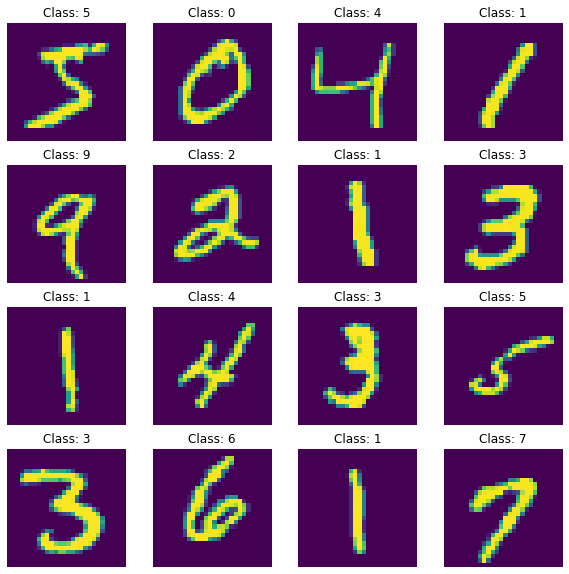

In [15]:
print(f"X_train_shape: {X_train.shape}")  
print(f"y_train_shape: {y_train.shape}")  
print(f"X_test_shape: {X_test.shape}")  
print(f"y_test_shape: {y_test.shape}") # 데이터의 형태 확인 


class_names = ["0","1","2","3","4","5","6","7","8","9"] # 총 10개의 클래스
plt.figure(figsize=(10, 10))
images, labels = X_train[:16], y_train[:16].flatten()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {class_names[labels[i]]}")
    plt.axis("off")

# 데이터 전처리
- 학습에 용이하게 학습 데이터를 0~1 범위로 정규화를 진행했습니다. 
- sparse_categorical_crossentropy를 사용하기 때문에 타겟값은 따로 원핫 인코딩을 진행하지 않았습니다.
- 각각의 형태를 살펴보겠습니다.

In [16]:
## 전처리
num_class = len(set(y_train)) # 클래스 갯수
print('클래스 수 :', num_class)

X_train = X_train / 255.0 # 0-1 범위로 정규화
X_test  = X_test / 255.0

print('X_train_shape : ', X_train.shape)
print('X_test_shape : ', X_test.shape)

# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10) # categorical_crossentropy

print('y_train_shape : ', y_train.shape)
print('y_test_shape :', y_test.shape)

클래스 수 : 10
X_train_shape :  (60000, 28, 28)
X_test_shape :  (10000, 28, 28)
y_train_shape :  (60000,)
y_test_shape : (10000,)


- 모델을 구성하는데 있어서 입력개수인 784개를 시작으로 relu활성화함수를 사용하는 완전연결층을 3개로 구성하고 마지막 출력층은 10개로 출력되도록 모델을 구성해보았습니다.

In [17]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(784, activation = 'relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

- 학습률(Learning_Rate는 1e-4로 옵티마이저는 Adam을 사용했고 학습횟수는 10회로 지정했습니다.

In [18]:
learning_rate = 1e-4
optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
loss = tf.keras.losses.sparse_categorical_crossentropy
epochs = 10

model.compile(loss=loss, optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 784)               615440    
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 100)               25700     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 843,110
Trainable params: 843,110
Non-trainable params: 0
_________________________________________________________________


In [19]:
hist = model.fit(X_train, y_train, batch_size = 32, epochs = epochs, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3115 - acc: 0.9149 - val_loss: 0.1407 - val_acc: 0.9592
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1183 - acc: 0.9654 - val_loss: 0.0994 - val_acc: 0.9703
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0786 - acc: 0.9770 - val_loss: 0.0880 - val_acc: 0.9716
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0553 - acc: 0.9838 - val_loss: 0.0731 - val_acc: 0.9775
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0412 - acc: 0.9879 - val_loss: 0.0670 - val_acc: 0.9793
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0296 - acc: 0.9910 - val_loss: 0.0681 - val_acc: 0.9795
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0216 - acc: 0.9938 - val_loss: 0.0579 - val_acc: 0.9818
Epoch 8/10
1875/1875 [==============================] - 9s 5ms

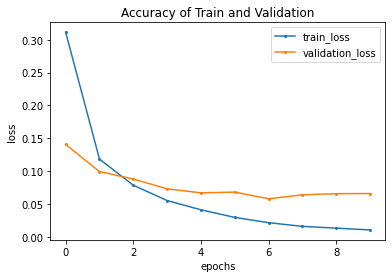

In [20]:
plt.title('Accuracy of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'], marker = 'o', ms = 2, label='train_loss')
plt.plot(hist.history['val_loss'], marker = 'o', ms = 2, label='validation_loss')
plt.legend()

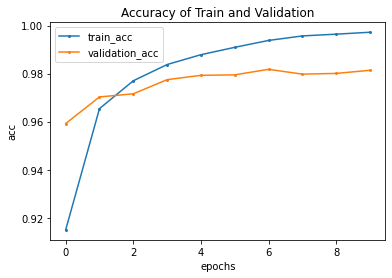

In [21]:
plt.title('Accuracy of Train and Validation')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(hist.history['acc'], marker = 'o', ms = 2, label='train_acc')
plt.plot(hist.history['val_acc'], marker = 'o', ms = 2, label='validation_acc')
plt.legend()

- 학습 결과 검증 데이터 정확도 98%로 기존 베이스라인 모델보다 성능 향상이 두드러집니다.
- 그렇다면 모델이 정확히 예측했는지 확인해보도록 하겠습니다.

In [22]:
preds = model.predict(X_test, batch_size=128)
print('예측값 : ', np.argmax(preds[2770]))
print('정답 : ', y_test[2770])

79/79 [==============================] - 0s 2ms/step
예측값 :  3
정답 :  3


- 3과 5 사이의 애매한 숫자를 확인해보니 정답이 3으로 예측한 3과 일치합니다! 정확하게 예측한것을 확인할 수 있었습니다.

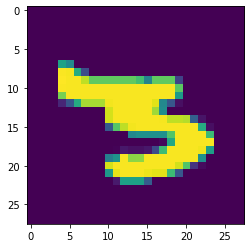

In [23]:
plt.imshow(X_test[2770].reshape(28, 28))
plt.show()